In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# truth informations on tracks in which we are interested
Oct-11, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/truth_tracks_information/'

# pairs of tracks at close proximity

In [43]:
tracks_MCbnbDATAcosmic = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_tracks.csv')
print len(tracks_MCbnbDATAcosmic),'tracks'
tracks_MCbnbMCcosmic = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/tracks/prodgenie_bnb_nu_cosmic_uboone_mcc8.2_reco2_tracks.csv')
print len(tracks_MCbnbMCcosmic),'tracks'

502227 tracks
22244 tracks


# $PID_a$ of $\mu,p,\pi,K$?

In [42]:
sam = tracks_MCbnbDATAcosmic
# sam = tracks_MCbnbMCcosmic
pions = sam[(sam['pdg']==211) | (sam['pdg']==-211)]
print 'len(pions):',len(pions)
protons = sam[sam['pdg']==2212]
print 'len(protons):',len(protons)
muons = sam[(sam['pdg']==13) | (sam['pdg']==-13)]
print 'len(muons):',len(muons)
Kaons = sam[(sam['pdg']==130) | (sam['pdg']==310) | (sam['pdg']==311) | (sam['pdg']==321)| (sam['pdg']==-321)]
print 'len(Kaons):',len(Kaons)
cosmic = sam[sam['pdg']==-9999]
print 'len(cosmic):',len(cosmic)
deuterons = sam[sam['pdg']==1000010020]
print 'len(deuterons):',len(deuterons)
alphas = sam[sam['pdg']==1000020040]
print 'len(alphas):',len(alphas)
Ar40 = sam[sam['pdg']==1000180400]
print 'len(Ar40):',len(Ar40)
electrons = sam[(sam['pdg']==11)|(sam['pdg']==-11)]
print 'len(electrons):',len(electrons)

len(pions): 4733
len(protons): 19198
len(muons): 42301
len(Kaons): 31
len(cosmic): 410317
len(deuterons): 50
len(alphas): 56
len(Ar40): 1429
len(electrons): 23282


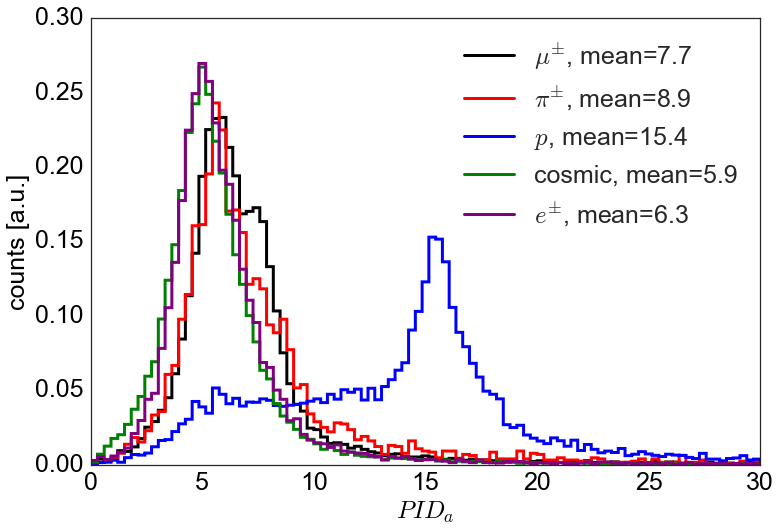

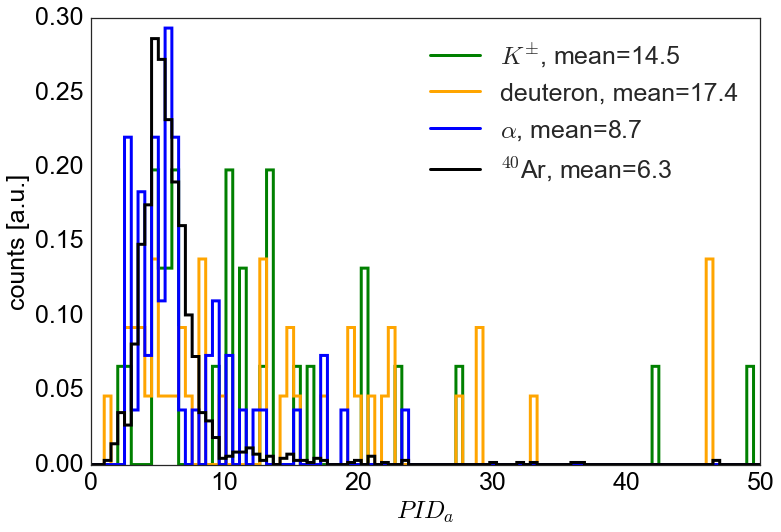

In [34]:
fig,ax=plt.subplots(figsize=(12,8))
for particle,name,color in zip([muons,pions,protons,cosmic,electrons]
                               ,[r'$\mu^{\pm}$',r'$\pi^{\pm}$',r'$p$',r'cosmic',r'$e^{\pm}$']
                               ,['black','red','blue','green','purple','orange']):
    PIDa = particle[particle['PIDa']<100]['PIDa']
    plt.hist(PIDa,bins=np.linspace(0,30,100),normed=1,histtype='step',linewidth=3,color=color)
    mean = np.mean(PIDa)
    std = np.std(PIDa)
    plt.plot([0,0],[0,0],label=name+', mean=%.1f'%(mean),linewidth=3,color=color)
set_axes(ax,r'$PID_a$','counts [a.u.]',do_add_legend=True)
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/PIDa/PIDaOfTruthParticles.pdf')

fig,ax=plt.subplots(figsize=(12,8))
for particle,name,color in zip([Kaons,deuterons,alphas,Ar40]
                               ,[r'$K^{\pm}$',r'deuteron',r'$\alpha$',r'$^{40}$Ar']
                               ,['green','orange','blue','black']):
    PIDa = particle[particle['PIDa']<100]['PIDa']
    plt.hist(PIDa,bins=np.linspace(0,50,100),normed=1,histtype='step',linewidth=3,color=color)
    mean = np.mean(PIDa)
    std = np.std(PIDa)
    plt.plot([0,0],[0,0],label=name+', mean=%.1f'%(mean),linewidth=3,color=color)
set_axes(ax,r'$PID_a$','counts [a.u.]',do_add_legend=True)
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/PIDa/PIDaOfTruthParticles_FewStatistics.pdf')

In [16]:
# fig,ax=plt.subplots(figsize=(12,8))
pdg = tracks_MCbnbDATAcosmic[tracks_MCbnbDATAcosmic['pdg']>1e9]['pdg']
pdg.groupby()
# plt.hist(pdg,bins=100);
# ax.set_yscale('log')

TypeError: You have to supply one of 'by' and 'level'

In [18]:
pdg_groups = tracks_MCbnbDATAcosmic.groupby('pdg')
pdg_groups

In [20]:
pdg_groups.first()

,run,subrun,event,track_id,start_x,start_y,start_z,end_x,end_y,end_z,PIDa,length,origin
pdg,,,,,,,,,,,,,
-9999,1,2756,137751,2,186.18100,-115.26800,272.5550,137.1300,-23.6025,335.465,6.50012,121.54500,unknown origin
-321,1,2644,132176,1,175.23800,-68.53910,758.5700,143.4300,-66.7993,831.661,23.01100,79.86760,beam neutrino
-211,1,2763,138125,1,236.02900,-78.39830,640.1740,198.8340,-102.5190,771.810,19.64220,139.19400,beam neutrino
-13,1,2762,138097,3,228.48500,-7.09467,911.3980,255.7260,21.8458,927.177,5.79272,42.77080,beam neutrino
-11,1,2758,137885,1,10.25370,-66.09910,871.1920,183.4340,112.5830,907.639,6.11641,251.67800,beam neutrino
11,1,2756,137751,0,230.15800,117.02300,432.7780,156.0440,-80.8193,551.110,5.52710,242.75700,beam neutrino
13,1,2756,137759,1,80.70130,88.50270,323.6420,64.4339,115.7320,521.590,5.19986,204.98400,beam neutrino
22,1,2756,137794,0,5.32405,-62.53940,419.1630,109.8110,115.7030,530.361,5.03873,235.15900,beam neutrino
211,1,2756,137775,7,126.84500,107.53700,601.8000,112.1140,112.1180,604.405,7.35422,15.65430,beam neutrino
